Agnaldo Nunes de Oliveira - **11221946**

Gustavo Santos Morais - **11221932**

Matheus Barbosa Silva - **11221741**


---


# **EP1 - MAC0209 - Modelagem e Simulação de EDOs**
---

O movimento MRU consiste em um ponto que anda em uma distância $x$ em um certo tempo $t$, com a velocidade $v$, onde $v$ é a velocidade do ponto. O movimento acontece apenas no eixo $x$. 

Enquanto que o movimento MRUV consiste em um ponto que anda em uma distância $x$ em um certo tempo $t$, com a velocidade $v$ e a aceleração $a$, onde $v$ e $a$ são a velocidade e a aceleração do ponto. O movimento acontece apenas no eixo x. 

No MRUV o ponto começa com uma velocidade $v$, e aumenta a sua velocidade apenas sobre influência da aceleração $a$.

# **Preâmbulo (MRU)**

In [0]:
#Movimento Retilíneo Uniforme
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import os
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
import random
import requests
import os
from io import BytesIO

#**Modelagem e Análise Gráfica (MRU)**

Para calcular a posição do ponto analiticamente, criamos um $x$ inicial (representado como params[1]), e calculamos a sua posição depois de um certo tempo $t$ com uma velocidade $v$ (representado como params[0]), ou seja $x$($t$)$=$$x_0$+$v$($t$).

Para calcular a posição do ponto por Euler, usando o algoritmo ensinado em aula, teremos que  $nextX =xAnt +(v\Delta t)$.

In [0]:
def nextXeuler(x, t, dt, params):
  return (x + params[0]*dt)

def nextXanalytical(t, params):
  return (params[1] + params[0]*t)

Erro:  0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  1.4210854715202004e-14
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  0.0
Erro:  -2.842170943040401e-14
Erro:  -2.842170943040401e-14
Erro:  -2.842170943040401e-14
Erro:  -5.684341886080802e-14
Erro:  -5.684341886080802e-14
Erro:  -2.842170943040401e-14
Erro:  -5.684341886080802e-14
Erro:  -5.684341886080802e-14
Erro:  -5.684341886080802e-14
Erro:  -1.1368683772161603e-13
Erro:  -1.1368683772161603e-13
Erro:  -1.1368683772161603e-13
Erro:  -1.1368683772161603e-13
Erro:  -1.1368683772161603e-13
Erro:  -1.1368683772161603e-13
Erro:  -1.1368683772161603e-13
Erro:  -1.1368683772161603e-13
Erro:  -1.7053025658242404e-13
Erro:  -1.7053025658242404e-13
Erro:  -1.7053025658242404e-13
Erro:  -1.7053025658242404e-13
Erro:  -1.7053025658242404e-13
Erro:  -1.7053025658242404e-13
Erro:  -1.7053025658242404e-13
Erro:  -2.2737367544323206e-13


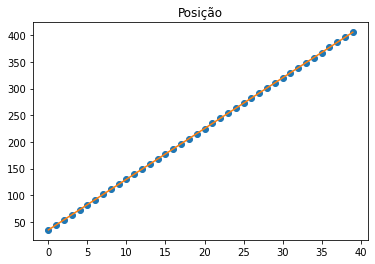

In [0]:
t = 0
dt = 0.1
tf = 4
v = 95
x = 35
params = [v, x]
vXe = []
vXa = []
while (t < tf):
  vXa.append(nextXanalytical(t, params))
  vXe.append(x)
  print('Erro: ', x - nextXanalytical(t,params))
  t += dt
  x = nextXeuler(x, t, dt, params)
plt.figure(0)
plt.plot(vXe,label='Euler',linestyle='',marker='o') 
plt.plot(vXa,label='Analítico') 
plt.title('Posição')
plt.show(block=False)

y = list(np.ones((len(vXa),1)) * 75)

# **Animação (MRU)**

Para a animação, usamos o código mostrado em aula como base. As mudanças feitas foram:



*   O link para a imagem;
*   O vetor usado para simular o movimento, que nesse caso, era o vetor com os valores do ponto em X, em decorrência do tempo (vXa)







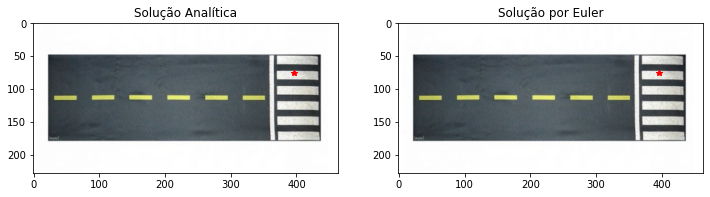

In [0]:
xAnim = vXa
yAnim = y

def initAnimate():
  line0.set_data([], [])
  line1.set_data([], [])
  return (line0, line1)

def loadImage():
  imgurl='https://pngimage.net/wp-content/uploads/2018/06/rua-png-3.png'
  img = plt.imread(BytesIO(requests.get(imgurl).content))
  return(img)

def animate(i):
    ind0 = i%len(xAnim)
    ind1 = ind0
    
    line0.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    line1.set_data([vXe[ind0], vXe[ind1]] , [yAnim[ind0], yAnim[ind1]])
    return (line0, line1)

def createAnimPlot(titleStr, xAnim):
    img = loadImage()
    plotSizeK=1

    figAnim, axAnim = plt.subplots(1, 2, figsize = (plotSizeK*12, plotSizeK*6))
    axAnim[0].set_title("Solução Analítica")
    axAnim[0].imshow(img)

    axAnim[1].set_title("Solução por Euler")
    axAnim[1].imshow(img)
    
    line0, = axAnim[0].plot([], [], 'r-*', lw=5)
    line1, = axAnim[1].plot([], [], 'r-*', lw=5)
    nFrames=len(xAnim)-1
    
    return(figAnim, axAnim, nFrames, line0, line1)

figAnim, axAnim, nFrames, line0, line1 = createAnimPlot('Animação do Trajeto Simulado: Solução Analítica', xAnim)

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                            frames=nFrames, interval=1000, blit=True)

rc('animation', html='jshtml')

anim

# **Preâmbulo (MRUV)**

In [0]:
import math
import matplotlib.pyplot as pyplot

# **Modelagem e Análise Gráfica (MRUV)**

Para calcular a posição do ponto analiticamente, criamos um  $x$  inicial (representado como params[2]), e calculamos a sua posição depois de um certo tempo  $t$  com uma velocidade  $v$  (representado como params[1]) e uma aceleração $a$ (representado como params[0]) , ou seja  $x$ ( $t$ )$=  x_0 +  v$ ($t$)$+at^2/2$.

Para calcular a posição do ponto por Euler, usando o algoritmo ensinado em aula, teremos que  $nextX=xAnt+v\Delta t+at \Delta t$



In [0]:
def nextXeuler(x, t, dt, params):
  return (x + params[1]*dt + params[0]*t*dt)

def nextXanalytical(t, params):
  return (params[2] + params[1]*t + (params[0]*t*t)/2)

Para calcular a velocidade do ponto analiticamente, criamos um  $v$  inicial (representado como params[2]), e calculamos a sua posição depois de um certo tempo  $t$  com uma velocidade  $v$  (representado como params[1]) e uma aceleração $a$ (representado como params[0]) , ou seja  $v(t)=  v_0 + at$.

Para calcular a velocidade do ponto por Euler, usando o algoritmo ensinado em aula, teremos que  $nextV=vAnt+a\Delta t$

In [0]:
def nextVeuler(v, dt, params):
  return params[0]*dt + v

def nextVanalytical(t, params):
  return params[1] + params[0]*t

Erro (X):  0.0
Erro (V):  0
Erro (X):  0.010000000000005116
Erro (V):  0.0
Erro (X):  0.020000000000003126
Erro (V):  7.105427357601002e-15
Erro (X):  0.030000000000001137
Erro (V):  7.105427357601002e-15
Erro (X):  0.04000000000000625
Erro (V):  1.4210854715202004e-14
Erro (X):  0.05000000000000426
Erro (V):  1.4210854715202004e-14
Erro (X):  0.060000000000016485
Erro (V):  1.4210854715202004e-14
Erro (X):  0.0700000000000216
Erro (V):  2.1316282072803006e-14
Erro (X):  0.0800000000000125
Erro (V):  2.1316282072803006e-14
Erro (X):  0.09000000000001762
Erro (V):  2.842170943040401e-14
Erro (X):  0.10000000000002274
Erro (V):  2.842170943040401e-14
Erro (X):  0.11000000000002785
Erro (V):  2.842170943040401e-14
Erro (X):  0.12000000000001876
Erro (V):  3.552713678800501e-14
Erro (X):  0.13000000000002387
Erro (V):  3.552713678800501e-14
Erro (X):  0.140000000000029
Erro (V):  4.263256414560601e-14
Erro (X):  0.15000000000000568
Erro (V):  4.263256414560601e-14
Erro (X):  0.159999999999

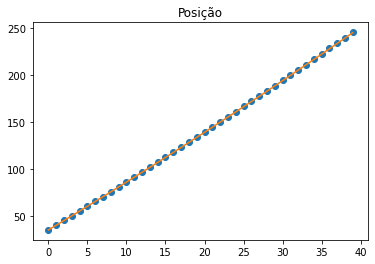

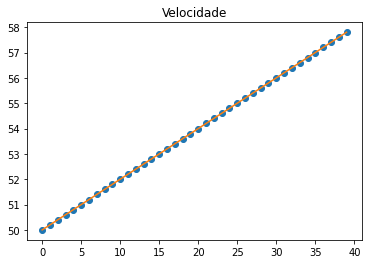

In [0]:
t = 0
dt = 0.1
a = 25
tf = 4
v = 50
x = 35
params = [a, v, x]
vXe = []
vXa = []
vVe = []
vVa = []
while (t < tf):
  vXa.append(nextXanalytical(t, params))
  vVa.append(nextVanalytical(t, params))
  vXe.append(x)
  vVe.append(v)
  print('Erro (X): ', x - nextXanalytical(t,params))
  print('Erro (V): ', v - nextVanalytical(t,params))
  t += dt
  x = nextXeuler(x, t, dt, params)
  v = nextVeuler(v, dt, params)
pyplot.figure(0)
pyplot.plot(vXe,label='Euler',linestyle='',marker='o') 
pyplot.plot(vXa,label='Analítico') 
pyplot.title('Posição')
pyplot.show(block=False)

pyplot.figure(1)
pyplot.plot(vVe,label='Euler',linestyle='',marker='o') 
pyplot.plot(vVa,label='Analítico') 
pyplot.title('Velocidade')
pyplot.show(block=False)

y = list(np.ones((len(vXa),1)) * 75)

# **Animação (MRUV)**

Para a animação, usamos o código mostrado em aula como base. As mudanças feitas foram:

*   O link para a imagem;
*   O vetor usado para simular o movimento, que nesse caso, era o vetor com os valores do ponto em X, em decorrência do tempo (vXa e vXe)




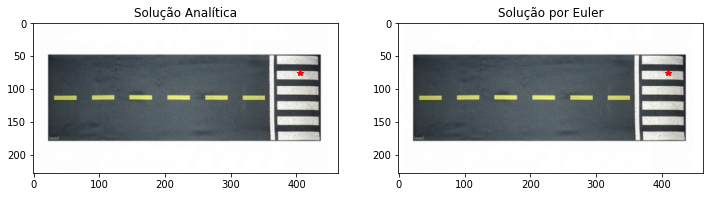

In [0]:
xAnim = vXa
yAnim = y

def initAnimate():
  line0.set_data([], [])
  line1.set_data([], [])
  return (line0, line1)

def loadImage():
  imgurl='https://pngimage.net/wp-content/uploads/2018/06/rua-png-3.png'
  img = plt.imread(BytesIO(requests.get(imgurl).content))
  return(img)

def animate(i):
    ind0 = i%len(xAnim)
    ind1 = ind0
    
    line0.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    line1.set_data([vXe[ind0], vXe[ind1]] , [yAnim[ind0], yAnim[ind1]])
    return (line0, line1)

def createAnimPlot(titleStr, xAnim):
    img = loadImage()
    plotSizeK=1

    figAnim, axAnim = plt.subplots(1, 2, figsize = (plotSizeK*12, plotSizeK*6))
    axAnim[0].set_title("Solução Analítica")
    axAnim[0].imshow(img)

    axAnim[1].set_title("Solução por Euler")
    axAnim[1].imshow(img)
    
    line0, = axAnim[0].plot([], [], 'r-*', lw=5)
    line1, = axAnim[1].plot([], [], 'r-*', lw=5)
    nFrames=len(xAnim)-1
    
    return(figAnim, axAnim, nFrames, line0, line1)

figAnim, axAnim, nFrames, line0, line1 = createAnimPlot('Animação do Trajeto Simulado: Solução Analítica', xAnim)

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                            frames=nFrames, interval=1000, blit=True)

rc('animation', html='jshtml')

anim